In [5]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 35.8 MB/s 
     |████████████████████████████████| 3.3 MB 50.6 MB/s 
     |████████████████████████████████| 662 kB 49.9 MB/s 
     |████████████████████████████████| 1.7 MB 61.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 141 kB 64.4 MB/s 
     |████████████████████████████████| 167 kB 75.8 MB/s 
     |████████████████████████████████| 6.8 MB 43.1 MB/s 
     |████████████████████████████████| 5.0 MB 43.8 MB/s 
     |████████████████████████████████| 325 kB 76.7 MB/s 
     |████████████████████████████████| 2.0 MB 64.0 MB/s 
     |████████████████████████████████| 88 kB 8.8 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 

In [6]:
import pandas as pd

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
#check the shape of data
dataset.shape

(1599, 12)

In [8]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


In [10]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'quality', session_id=123) 

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1439, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6852,0.6716,0.3763,0.6557,0.6654,0.4908,0.4950,0.255
et,Extra Trees Classifier,0.6545,0.6757,0.3552,0.6269,0.6347,0.4394,0.4438,0.206
lightgbm,Light Gradient Boosting Machine,0.6445,0.6566,0.3572,0.6221,0.6296,0.4304,0.4332,0.408
gbc,Gradient Boosting Classifier,0.6425,0.6404,0.3661,0.6236,0.6285,0.4295,0.4328,0.948
lr,Logistic Regression,0.5958,0.6029,0.2751,0.5572,0.5663,0.3314,0.3369,0.895
lda,Linear Discriminant Analysis,0.5948,0.6090,0.3285,0.5740,0.5810,0.3536,0.3556,0.027
ridge,Ridge Classifier,0.5859,0.0000,0.2480,0.5008,0.5307,0.2974,0.3083,0.009
dt,Decision Tree Classifier,0.5749,0.5469,0.3395,0.5758,0.5726,0.3412,0.3429,0.016
qda,Quadratic Discriminant Analysis,0.5393,0.5728,0.3516,0.5460,0.5373,0.2958,0.2986,0.015
ada,Ada Boost Classifier,0.5322,0.4855,0.2675,0.4505,0.4759,0.2189,0.2323,0.142


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6931,0.8497,0.3328,0.6580,0.6738,0.5102,0.5125
1,0.6931,0.8575,0.3427,0.6601,0.6751,0.5074,0.5097
2,0.6733,0.8040,0.4876,0.6498,0.6547,0.4678,0.4724
3,0.6634,0.7969,0.3577,0.6306,0.6465,0.4633,0.4646
4,0.6733,0.8243,0.3403,0.6441,0.6490,0.4694,0.4804
5,0.6634,0.8365,0.3076,0.6332,0.6336,0.4414,0.4488
6,0.7624,0.8943,0.3782,0.7219,0.7409,0.6195,0.6218
7,0.6000,0.0000,0.3362,0.5633,0.5795,0.3458,0.3478
8,0.7400,0.0000,0.5298,0.7412,0.7306,0.5813,0.5872


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6634,0.8587,0.3212,0.6282,0.6451,0.4610,0.4623
1,0.6535,0.8501,0.2997,0.6148,0.6307,0.4361,0.4396
2,0.6337,0.8293,0.4709,0.6128,0.6139,0.4022,0.4092
3,0.6634,0.8126,0.3579,0.6373,0.6484,0.4619,0.4647
4,0.6238,0.8447,0.3015,0.5995,0.6007,0.3786,0.3839
5,0.6436,0.8408,0.2993,0.6200,0.6167,0.4115,0.4184
6,0.6634,0.8694,0.3278,0.6346,0.6441,0.4638,0.4690
7,0.6100,0.0000,0.3411,0.5744,0.5901,0.3623,0.3645
8,0.7100,0.0000,0.5047,0.7073,0.7005,0.5353,0.5414


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [14]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0990,0.0,0.2564,0.0303,0.0434,0.0414,0.0743
1,0.4158,0.0,0.1923,0.2071,0.2640,0.0670,0.1362
2,0.4158,0.0,0.1735,0.4237,0.3038,0.0290,0.0569
3,0.3960,0.0,0.1667,0.1568,0.2247,0.0000,0.0000
4,0.4257,0.0,0.1670,0.2892,0.2790,0.0225,0.0454
5,0.4653,0.0,0.2021,0.5325,0.4042,0.1097,0.1396
6,0.4950,0.0,0.2877,0.2758,0.3527,0.2490,0.3222
7,0.3900,0.0,0.2355,0.5072,0.4154,0.1114,0.1198
8,0.3700,0.0,0.1850,0.1526,0.2161,-0.0511,-0.1579


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [15]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [16]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [17]:
print(svm)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [18]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5545,0.7145,0.3366,0.5564,0.5506,0.3210,0.3236
1,0.5842,0.7148,0.2634,0.5613,0.5585,0.3115,0.3177
2,0.5149,0.6761,0.2506,0.4864,0.4910,0.2103,0.2160
3,0.5248,0.7003,0.2999,0.5076,0.5057,0.2611,0.2671
4,0.5149,0.7014,0.2571,0.4854,0.4989,0.2216,0.2226
5,0.5842,0.6952,0.2745,0.5375,0.5562,0.3244,0.3290
6,0.6139,0.7627,0.4508,0.5825,0.5951,0.3837,0.3856
7,0.5500,0.0000,0.3352,0.5231,0.5246,0.2741,0.2835
8,0.5900,0.0000,0.3707,0.5636,0.5738,0.3538,0.3564


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [19]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6634,0.8115,0.3033,0.6235,0.6348,0.4453,0.4520
1,0.6238,0.8022,0.2696,0.6335,0.5838,0.3659,0.3769
2,0.5248,0.7122,0.2372,0.4879,0.4949,0.2123,0.2172
3,0.5842,0.7725,0.2757,0.5666,0.5613,0.3107,0.3157
4,0.5545,0.7647,0.2618,0.5205,0.5180,0.2598,0.2732
5,0.6238,0.7861,0.2718,0.6238,0.5838,0.3665,0.3766
6,0.6634,0.8369,0.2786,0.5872,0.6160,0.4393,0.4483
7,0.6000,0.0000,0.3124,0.5753,0.5663,0.3263,0.3332
8,0.6600,0.0000,0.3637,0.6616,0.6333,0.4347,0.4439


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [20]:
tuned_svm = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5842,0.0,0.2703,0.5534,0.5651,0.3351,0.3383
1,0.5941,0.0,0.2753,0.5849,0.5794,0.3415,0.3447
2,0.5050,0.0,0.2387,0.4789,0.4891,0.1979,0.1992
3,0.5545,0.0,0.3116,0.5464,0.5498,0.2994,0.2997
4,0.6139,0.0,0.3185,0.5880,0.5963,0.3768,0.3820
5,0.5545,0.0,0.2538,0.5397,0.5463,0.2963,0.2969
6,0.6733,0.0,0.3121,0.6244,0.6446,0.4708,0.4762
7,0.5400,0.0,0.3572,0.5305,0.5287,0.2524,0.2535
8,0.4700,0.0,0.1995,0.4730,0.4671,0.1716,0.1738


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [21]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [22]:
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [23]:
print(tuned_svm)

SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)


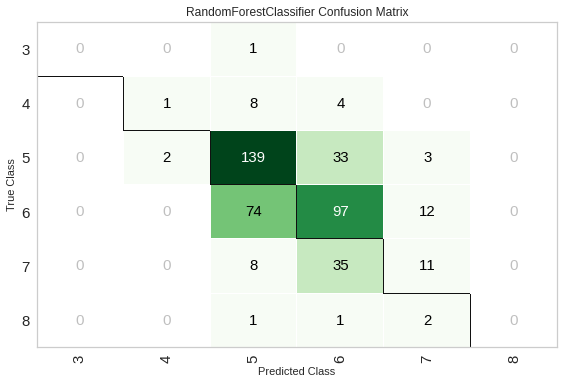

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(tuned_rf, plot = 'confusion_matrix')

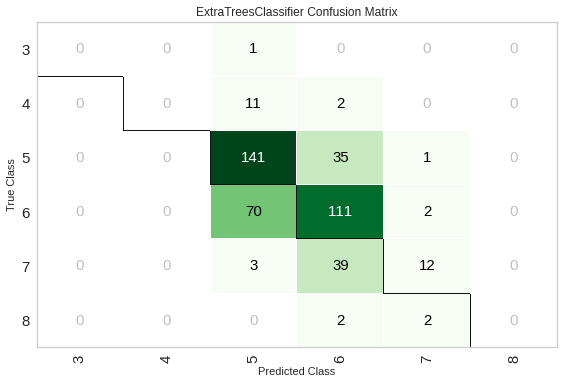

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_et, plot = 'confusion_matrix')

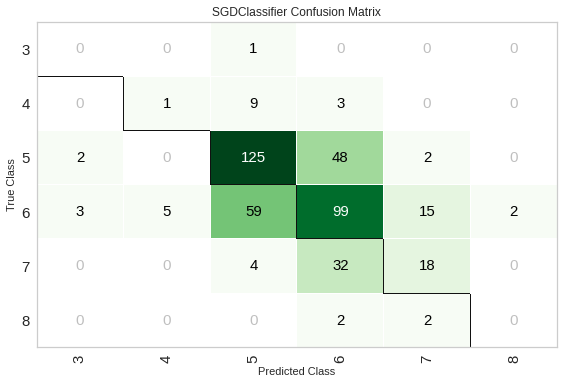

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tuned_svm, plot = 'confusion_matrix')

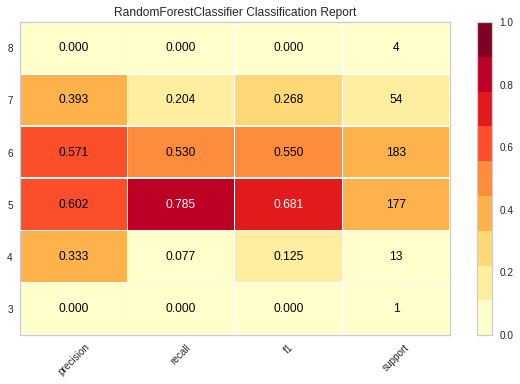

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(tuned_rf, plot = 'class_report')

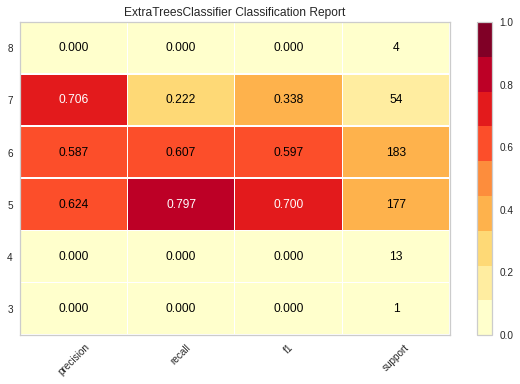

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(tuned_et, plot = 'class_report')

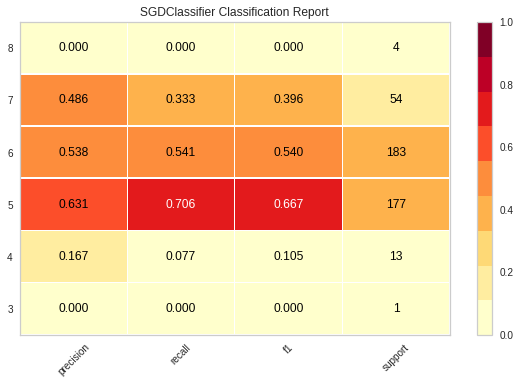

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(tuned_svm, plot = 'class_report')

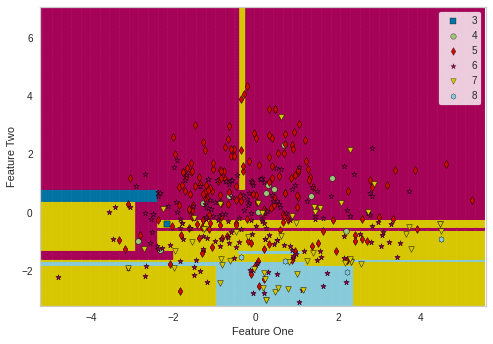

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(tuned_rf, plot='boundary')

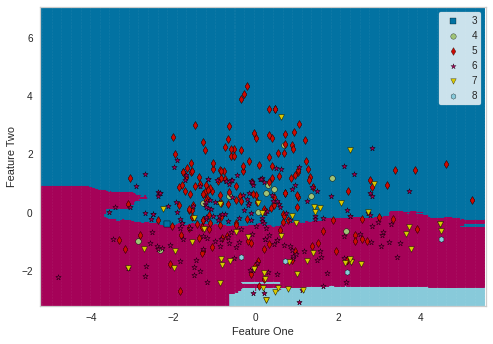

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(tuned_et, plot='boundary')

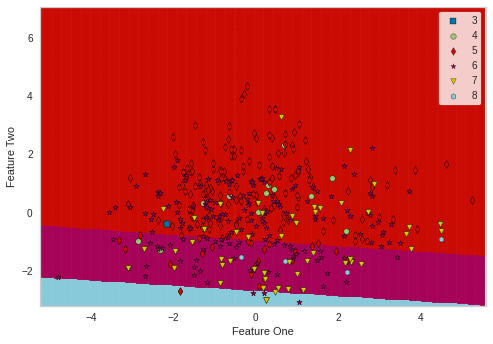

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(tuned_svm, plot='boundary')

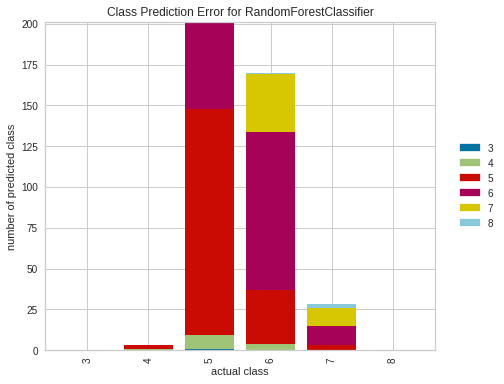

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [33]:
plot_model(tuned_rf, plot = 'error')

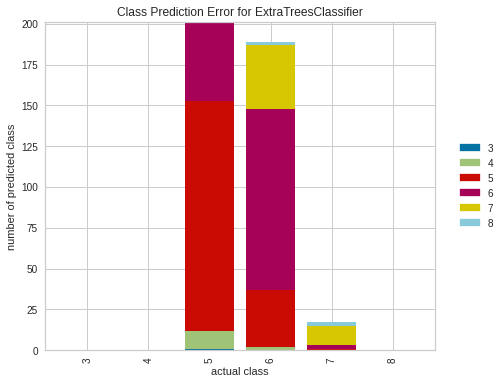

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(tuned_et, plot = 'error')

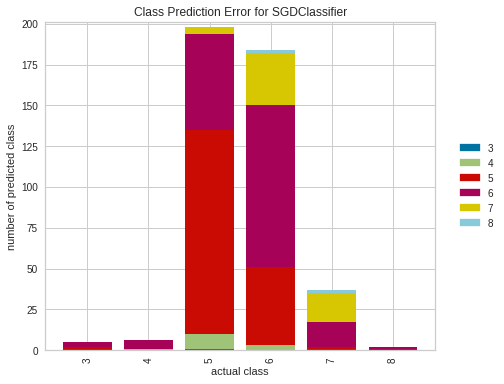

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(tuned_svm, plot = 'error')

In [37]:
predict_model(tuned_rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5741,0.7016,0.266,0.5474,0.5493,0.297,0.3029


IndexError: ignored

In [38]:
predict_model(tuned_et)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6111,0.7732,0.2709,0.5926,0.5818,0.3469,0.3546


IndexError: ignored

In [39]:
predict_model(tuned_svm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.5625,0,0.2762,0.5524,0.5543,0.295,0.2962


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,8.1,0.66,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,9.0,5,5
1,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,7
2,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.9,6,6
3,7.9,0.34,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,11.4,6,6
4,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,7
428,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,6,5
429,9.5,0.59,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5,5
430,6.7,0.54,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.8,5,5


In [40]:
final_et = finalize_model(tuned_et)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_i

In [41]:
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [42]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6062,0.789,0.2663,0.6073,0.5792,0.3394,0.3492


IndexError: ignored

In [43]:
save_model(final_et,'Final ET Model 03Dec2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), model_name=Final ET Model 03Dec2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_fe

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=5, max_features=1.0,
                                       max_leaf_nodes=No